In [10]:
from pyCRLD.Agents.StrategyActorCritic import stratAC
from pyCRLD.Environments.SocialDilemma import SocialDilemma
from pyCRLD.Environments.TwoStatesTwoActions import TwoStatesTwoActions
from pyCRLD.Utils import FlowPlot as fp


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# widgets
import ipywidgets as widgets
from IPython.display import display
from bayes_opt import BayesianOptimization, UtilityFunction, SequentialDomainReductionTransformer

# Standard library imports
import os
import math
import multiprocessing
import itertools as it
import tempfile
import warnings

# Third-party imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from scipy.stats import gaussian_kde
from scipy.optimize import minimize
from pyDOE import lhs
from IPython.display import HTML
from ipywidgets import interact, interact_manual
from bayes_opt import BayesianOptimization, UtilityFunction, SequentialDomainReductionTransformer

# Project-specific imports
from pyCRLD.Agents.StrategyActorCritic import stratAC
from pyCRLD.Agents.StrategySARSA import stratSARSA
from pyCRLD.Environments.SocialDilemma import SocialDilemma
from pyCRLD.Utils import FlowPlot as fp

# pyABC imports
import pyabc
from pyabc.distance import *
from pyabc.predictor import *
from pyabc.sumstat import *
from pyabc.util import EventIxs, ParTrafo, dict2arrlabels
from pyabc.visualization import plot_kde_matrix, plot_kde_1d_highlevel
from pyabc import ABCSMC, MedianEpsilon, LocalTransition, Distribution, RV


# Set matplotlib style and parameters
style.use('seaborn-v0_8')
plt.rcParams.update({
    'figure.figsize': (15, 4),
    'axes.facecolor': 'white',
    'grid.color': 'gray',
    'grid.linewidth': 0.0,
    'figure.dpi': 140,
    'axes.prop_cycle': plt.cycler(color=['#1f77b4'])  # Example to set the first color
})

# Configure interactive widgets for dynamic behavior in Jupyter notebooks
interact = interact_manual if 'get_ipython' in locals() else interact


ModuleNotFoundError: No module named 'pyCRLD.Environments.TwoStatesTwoActions'

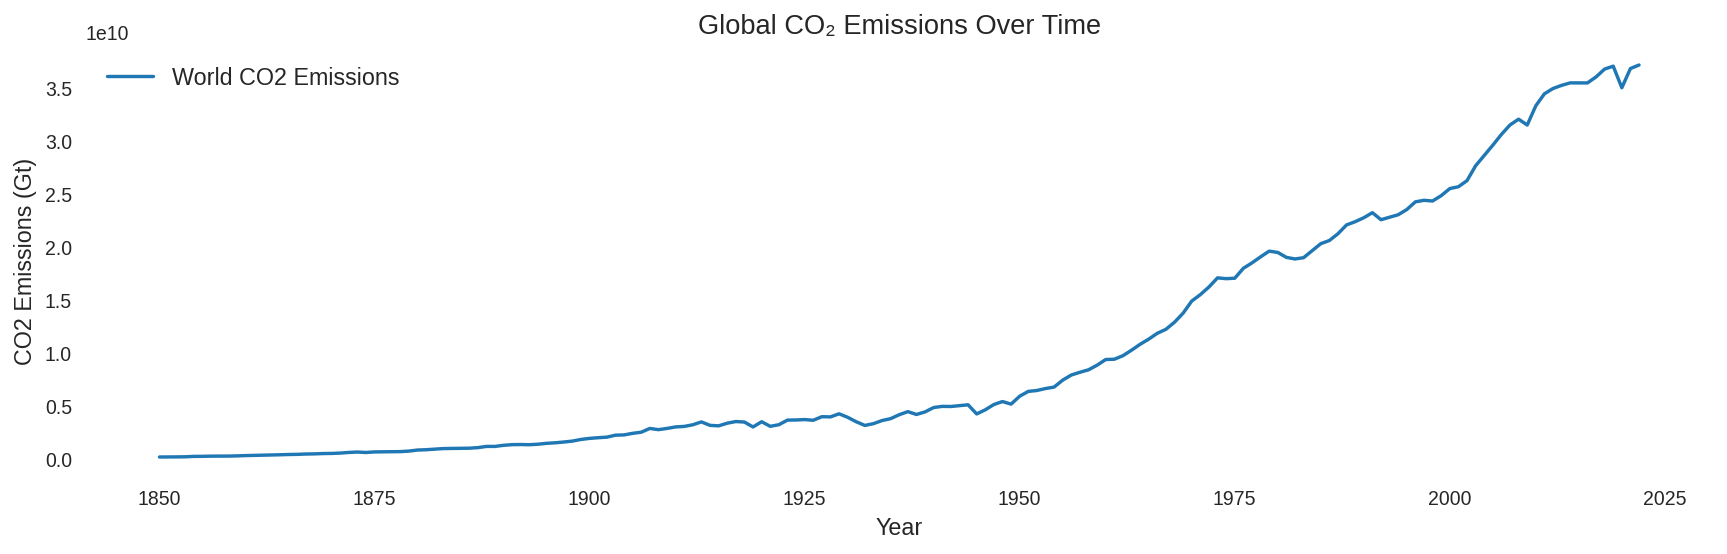

In [ ]:
# Reading local data (its downloaded on local storage)
data = pd.read_csv("co2.csv")

# Filtering out the data related to the world
world_co2_df = data[data["Entity"] == 'World'][['Year','Annual CO₂ emissions']]
# Create a list 
world_co2_list = world_co2_df.values.tolist() 
# Create a numpy array 
world_co2_array =  np.array(world_co2_list)
co2_emissions = world_co2_array[100:]

# Plotting
plt.plot(co2_emissions[:,0], co2_emissions[:,1], label='World CO2 Emissions')

# Axes Labels
plt.xlabel("Year", fontsize=12)
plt.ylabel("CO2 Emissions (Gt)", fontsize=12)

# Title
plt.title("Global CO₂ Emissions Over Time", fontsize=14)

# Grid and Legend
plt.grid(True, alpha=0.7)  # Adjusting grid visibility
plt.legend(fontsize='large')

# Show Plot
plt.show()

# Fit to the data manualy

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

# Assuming these classes are defined or imported:
# from your_module import TwoStatesTwoActions, stratAC

def model_plot(pc, pr, rs, rr, rd, xc, learning_rate, discount_factor,c):
    # Collapse probability when risky in prosperous
    # Recovery probability when cautious in degraded
    # Reward for staying prosperous and cautious
    # Reward for staying prosperous but risky
    # Reward when in degraded state
    
    # Initialize environment and interface
    env = TwoStatesTwoActions(pc, pr, rs, rr, rd)
    mae = stratAC(env=env, learning_rates=learning_rate, discount_factors=discount_factor)
    x = np.array(mae.random_softmax_strategy())

    
    x[0, 0, 0] = 1- xc  # from a random initial strategy
    x[0, 0, 1] = xc
    
    xtraj, fixedpointreached = mae.trajectory(x, Tmax=173)

    
    output = c*(xtraj[:,0,0,0])
    plt.plot(output,color="black")  # Assuming xtraj is plottable directly
    plt.plot(co2_emissions[:,1])
    plt.ylim([0,8e10])

# Setup interactive controls
pc_slider = widgets.FloatSlider(value=0.6, min=0, max=1, step=0.1, description='pc:')
pr_slider = widgets.FloatSlider(value=0.2, min=0, max=1, step=0.1, description='pr:')
rs_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='rs:')
rr_slider = widgets.FloatSlider(value=0.4, min=0, max=1, step=0.1, description='rr:')
rd_slider = widgets.FloatSlider(value=0.6, min=0, max=1, step=0.1, description='rd:')
xc_slider = widgets.FloatSlider(value=0.01, min=0, max=1, step=0.01, description='Xc:')
c_slider = widgets.FloatSlider(value=82108114000.00, min=1e+10, max=1e11, step=1000, description='C:')
learning_rate_slider = widgets.FloatSlider(value=0.5, min=0, max=1, step=0.1, description='learning_rate')
discount_factor_slider = widgets.FloatSlider(value=0.4, min=0, max=1, step=0.1, description='discount_factor')



widgets.interactive(model_plot, pc=pc_slider, pr=pr_slider, rs=rs_slider, rr=rr_slider, rd=rd_slider, xc=xc_slider,learning_rate=learning_rate_slider, discount_factor=discount_factor_slider, c=c_slider )




interactive(children=(FloatSlider(value=0.6, description='pc:', max=1.0), FloatSlider(value=0.2, description='…

# Smooth the data by using Savitzky-Golay

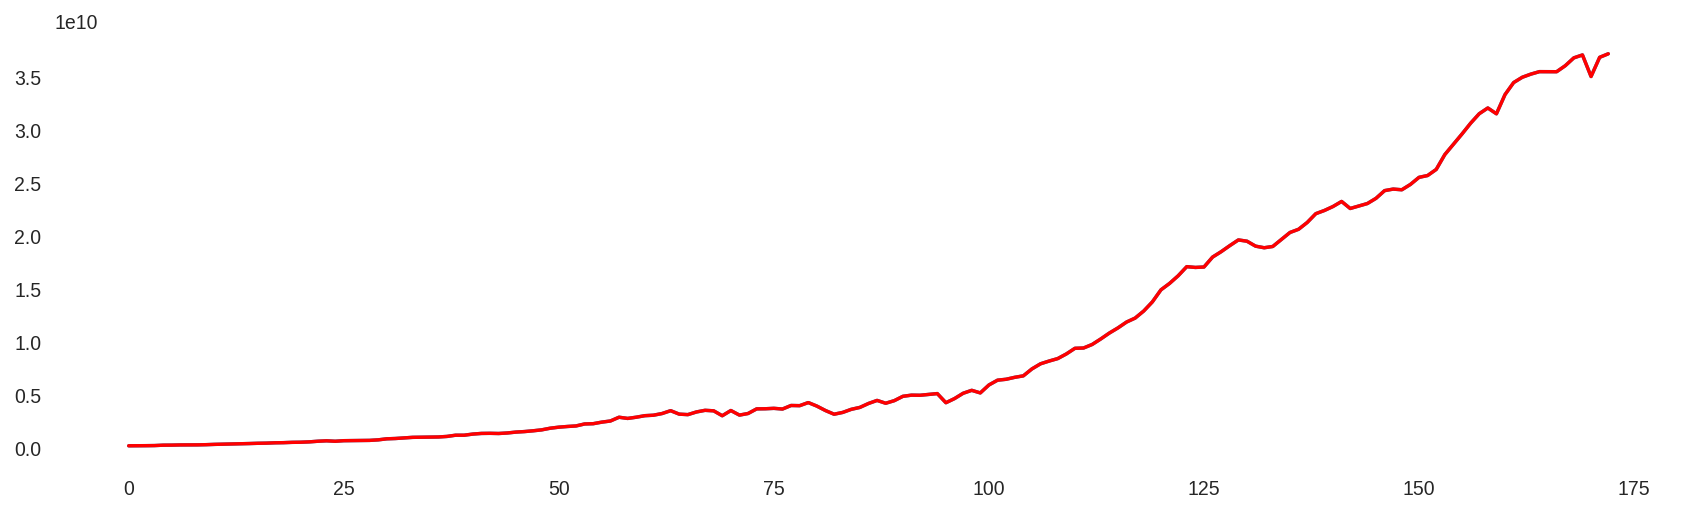

In [ ]:
data = co2_emissions[:,1]

from scipy.signal import savgol_filter
# Parameters for Savitzky-Golay
window_length = 3  # This should be a positive odd number
polyorder = 2 # Polynomial order (degree)

# Apply the filter
sg_data = savgol_filter(data, window_length=window_length, polyorder=polyorder)


plt.plot(co2_emissions[:,1])
plt.plot(sg_data, color="red")

observation = {}  
for i, datapoint in enumerate(sg_data):
        observation[f's{i}']=datapoint

In [ ]:
real_co2 = co2_emissions[:,1].copy()
co2_emissions[:,1] = sg_data

In [ ]:
co2_emissions[:,1]

array([1.9675197e+08, 1.9866811e+08, 2.0741420e+08, 2.1712043e+08,
       2.5503317e+08, 2.6010440e+08, 2.7729645e+08, 2.7993200e+08,
       2.8422515e+08, 3.0148125e+08, 3.3096260e+08, 3.4778582e+08,
       3.5448890e+08, 3.7818016e+08, 4.0772598e+08, 4.3285914e+08,
       4.4655360e+08, 4.7816074e+08, 4.9155194e+08, 5.2195420e+08,
       5.3333827e+08, 5.6689130e+08, 6.2730125e+08, 6.6648120e+08,
       6.2423250e+08, 6.7711386e+08, 6.8678020e+08, 7.0040440e+08,
       7.0597357e+08, 7.5599046e+08, 8.5391635e+08, 8.8354406e+08,
       9.3336010e+08, 9.9275360e+08, 1.0041341e+09, 1.0116371e+09,
       1.0274175e+09, 1.0787469e+09, 1.1943526e+09, 1.1946240e+09,
       1.3003624e+09, 1.3617501e+09, 1.3723965e+09, 1.3554772e+09,
       1.4030191e+09, 1.4874323e+09, 1.5363656e+09, 1.6092316e+09,
       1.6971663e+09, 1.8537092e+09, 1.9522095e+09, 2.0167444e+09,
       2.0676838e+09, 2.2541002e+09, 2.2797473e+09, 2.4273183e+09,
       2.5347330e+09, 2.8883180e+09, 2.7764408e+09, 2.8904950e

# Using Gaussian - Bayesian approach

In [ ]:
def model(pc, pr, rs, rr, learning_rate, discount_factor,c):
    # Collapse probability when risky in prosperous
    # Recovery probability when cautious in degraded
    # Reward for staying prosperous and cautious
    # Reward for staying prosperous but risky
    # Reward when in degraded state
    
    # Initialize environment and interface
    rd=0
    
    env = TwoStatesTwoActions(pc, pr, rs, rr, rd)
    mae = stratAC(env=env, learning_rates=learning_rate, discount_factors=discount_factor)
    x = np.array(mae.random_softmax_strategy())
    xc= .999
    
    x[0, 0, 0] = 1 - xc  # from a random initial strategy
    x[0, 0, 1] = xc
    
    xtraj, fixedpointreached = mae.trajectory(x, Tmax=173)

    
    output = np.array(c*1e10*(xtraj[:,0,0,0]))
    

    if len(output) < len(co2_emissions[:,1]):
            output = np.zeros(len(co2_emissions[:,1]))
    return np.sum(np.square(output - co2_emissions[:,1]))

In [ ]:

def objective_function(pc, pr, rs, rr,  learning_rate, discount_factor,c):
    return -model(pc, pr, rs, rr,  learning_rate, discount_factor,c)

# Parameters bounds corrected to match function arguments
parameter_bounds = {
    'pc': (0, 1),
    'pr': (0, 1),
    'rs': (0,1),
    'rr': (0,1),
    'learning_rate': (0, 1),
    'discount_factor': (0, 1),  # Adjusted to allow a range
    'c': (3, 10),
}


bounds_transformer = SequentialDomainReductionTransformer(minimum_window=.01)

# Bayesian Optimization setup with bounds_transformer
optimizer = BayesianOptimization(
    f=objective_function,
    pbounds=parameter_bounds,
    random_state=1,
    bounds_transformer=bounds_transformer

    
)

utility_function = UtilityFunction(kind="ucb", kappa=10, xi=1)

optimizer.maximize(
    init_points=10,
    n_iter=2000,
)

# Results parsing adjusted
all_fits = [{'params': res['params'], 'target': res['target']} for res in optimizer.res]

# Assuming you might want to print or handle `all_fits` here:




NameError: name 'SequentialDomainReductionTransformer' is not defined

In [ ]:
def model_plot_2(pc, pr, rs, rr, rd, xc, learning_rate, discount_factor,c):
    # Collapse probability when risky in prosperous
    # Recovery probability when cautious in degraded
    # Reward for staying prosperous and cautious
    # Reward for staying prosperous but risky
    # Reward when in degraded state
    
    # Initialize environment and interface
    env = TwoStatesTwoActions(pc, pr, rs, rr, rd)
    mae = stratAC(env=env, learning_rates=learning_rate, discount_factors=discount_factor)
    x = np.array(mae.random_softmax_strategy())

    
    x[0, 0, 0] = 1- xc  # from a random initial strategy
    x[0, 0, 1] = xc
    
    xtraj, fixedpointreached = mae.trajectory(x, Tmax=173)

    
    return  c*1e10*np.array((xtraj[:,0,0,0]))

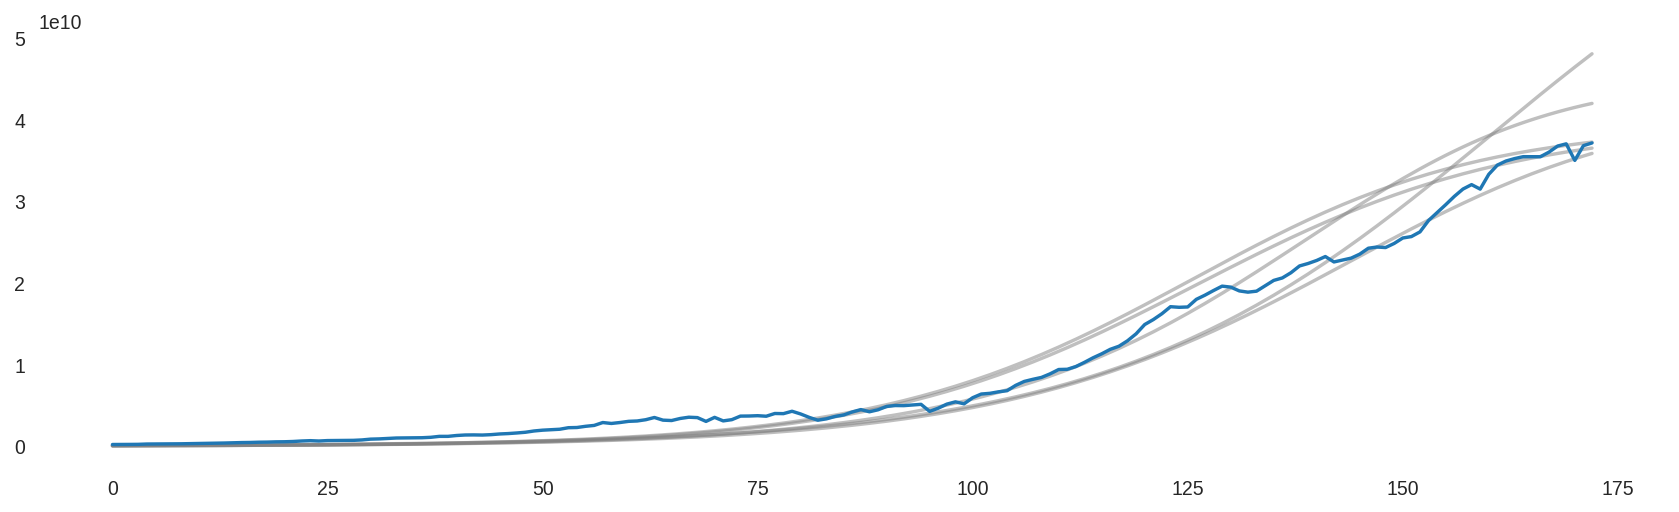

In [ ]:


# Sort the fits in descending order based on 'target'
sorted_fits = sorted(all_fits, key=lambda x: -x['target'])

# Prepare data for plotting
plot_data = []
for fit in sorted_fits[:5]:
    params = fit['params']
    
    # Extract parameters with default values to avoid KeyError
    c = params.get('c', 0)
    discount_factor = params.get('discount_factor', 0)
    learning_rate = params.get('learning_rate', 0)
    pc = params.get('pc', 0)
    pr = params.get('pr', 0)
    rd = params.get('rd', 0)
    rr = params.get('rr', 0)
    rs = params.get('rs', 0)
    xc = params.get('xc', .999)


    # Append model output to list for plotting
    model_output = model_plot_2(pc, pr, rs, rr, rd, xc, learning_rate, discount_factor, c)
    plot_data.append(model_output)

# Plotting
for data in plot_data:
    plt.plot(data, color='gray', alpha=.5)
plt.plot(co2_emissions[:,1])


In [ ]:
for fit in sorted_fits[:10]:
    print(fit)

{'params': {'c': 3.9293779550381664, 'discount_factor': 0.6964071460172183, 'learning_rate': 0.2138995203204498, 'pc': 0.26390043007127395, 'pr': 1.0, 'rr': 0.6032132582434182, 'rs': 0.6246569854580136}, 'target': -7.953653448231037e+20}
{'params': {'c': 3.943141070963796, 'discount_factor': 0.6201988085487379, 'learning_rate': 0.35003699357345347, 'pc': 0.0, 'pr': 1.0, 'rr': 0.41600042686951677, 'rs': 0.5726955404739749}, 'target': -8.81176242781318e+20}
{'params': {'c': 4.188812936951982, 'discount_factor': 0.8781425034294131, 'learning_rate': 0.0983468338330501, 'pc': 0.42110762500505217, 'pr': 0.9578895301505019, 'rr': 0.5331652849730171, 'rs': 0.6918771139504734}, 'target': -8.91418050433818e+20}
{'params': {'c': 4.531043758221551, 'discount_factor': 0.5941534477701326, 'learning_rate': 0.42535267590250925, 'pc': 0.404568211972175, 'pr': 0.0, 'rr': 1.0, 'rs': 0.48990554562800864}, 'target': -1.260170862135274e+21}
{'params': {'c': 7.225134801482519, 'discount_factor': 0.2800456491

# Using Monte Carlo Bayesian Approach


In [ ]:

#from pyabc import MulticoreParticleParallelSampler as sampler
#from pyabc import MulticoreEvalParallelSampler as sampler
from pyabc import SingleCoreSampler as sampler

sampler = sampler()


In [ ]:
def model_abc(params):
    # Unpack parameters
    pc = params['pc']
    pr = params['pr']
    rs = params['rs']
    rr = params['rr']
    rd = params['rd']
    xc = params['xc']
    learning_rate = params['learning_rate']
    discount_factor = params['discount_factor']
    c = params['c']
    
    # Model logic remains the same
    env = TwoStatesTwoActions(pc, pr, rs, rr, rd)
    mae = stratAC(env=env, learning_rates=learning_rate, discount_factors=discount_factor)
    x = np.array(mae.random_softmax_strategy())
    
    x[0, 0, 0] = 1 - xc  # from a random initial strategy
    x[0, 0, 1] = xc
    
    xtraj, fixedpointreached = mae.trajectory(x, Tmax=173)
    output = {}
    model_output = np.array(c * 1e10 * ( xtraj[:, 0, 0, 0]))
    for i, datapoint in enumerate(model_output):
        output[f's{i}']=datapoint
    return output


In [ ]:
# Define the path
db_path = "sqlite:///" + os.path.join(tempfile.gettempdir(), "test_abc.db")

# Define the parameter priors
parameter_prior = Distribution(
    pc=RV("uniform", 0, 1),            # Collapse probability when risky in prosperous
    pr=RV("uniform", 0, 1),            # Recovery probability when cautious in degraded
    rs=RV("uniform", 0, 1),            # Reward for staying prosperous and cautious
    rr=RV("uniform", 0, 1),            # Reward for staying prosperous but risky
    rd=RV("uniform", 0, 1),            # Reward when in degraded state
    xc=RV("uniform", 0, 1),            # Initial strategy mix
    learning_rate=RV("uniform", 0, 1),  # Learning rate
    discount_factor=RV("uniform", 0, 1),  # Discount factor close to 1
    c=RV("uniform", 1, 10)             # Scaling factor 'c'
)


In [ ]:
abc = ABCSMC(
    models=model_abc,
    parameter_priors=parameter_prior,
    distance_function=pyabc.AdaptivePNormDistance(p=2),
    population_size=500,
    transitions=LocalTransition(),
    eps=MedianEpsilon(initial_epsilon=10e16, median_multiplier=.7),
    sampler=sampler
)

# Start the ABC-SMC algorithm
abc_id = abc.new(db_path, observation)
h1 = abc.run(minimum_epsilon=200, max_nr_populations=100)


ABC.History INFO: Start <ABCSMC id=3, start_time=2024-08-23 14:19:01>
ABC INFO: Calibration sample t = -1.
Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x756d7c6f1b20>
Traceback (most recent call last):
  File "/home/localuser/anaconda3/lib/python3.11/weakref.py", line 369, in remove
    def remove(k, selfref=ref(self)):

KeyboardInterrupt: 


In [ ]:
def visualize_parameters(history):
    params = ['pc', 'pr', 'learning_rate', 'discount_factor','c','rs','rr','rd','xc']  # List of parameters to plot
    n_cols = 2  # Number of columns in the subplot
    n_rows = (len(params) + n_cols - 1) // n_cols  # Calculate rows needed
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()  # Flatten to 1D array for easy iteration
    
    # Loop through each parameter and plot
    for idx, param in enumerate(params):
        ax = axes[idx]
        for t in range(history.max_t + 1):
            plot_kde_1d_highlevel(
                history,
                t=t,
                x=param,
                ax=ax,
                label=f"t={t}"
            )
        ax.set_title(f'Distribution of {param}')
    
    fig.tight_layout()
    plt.show()

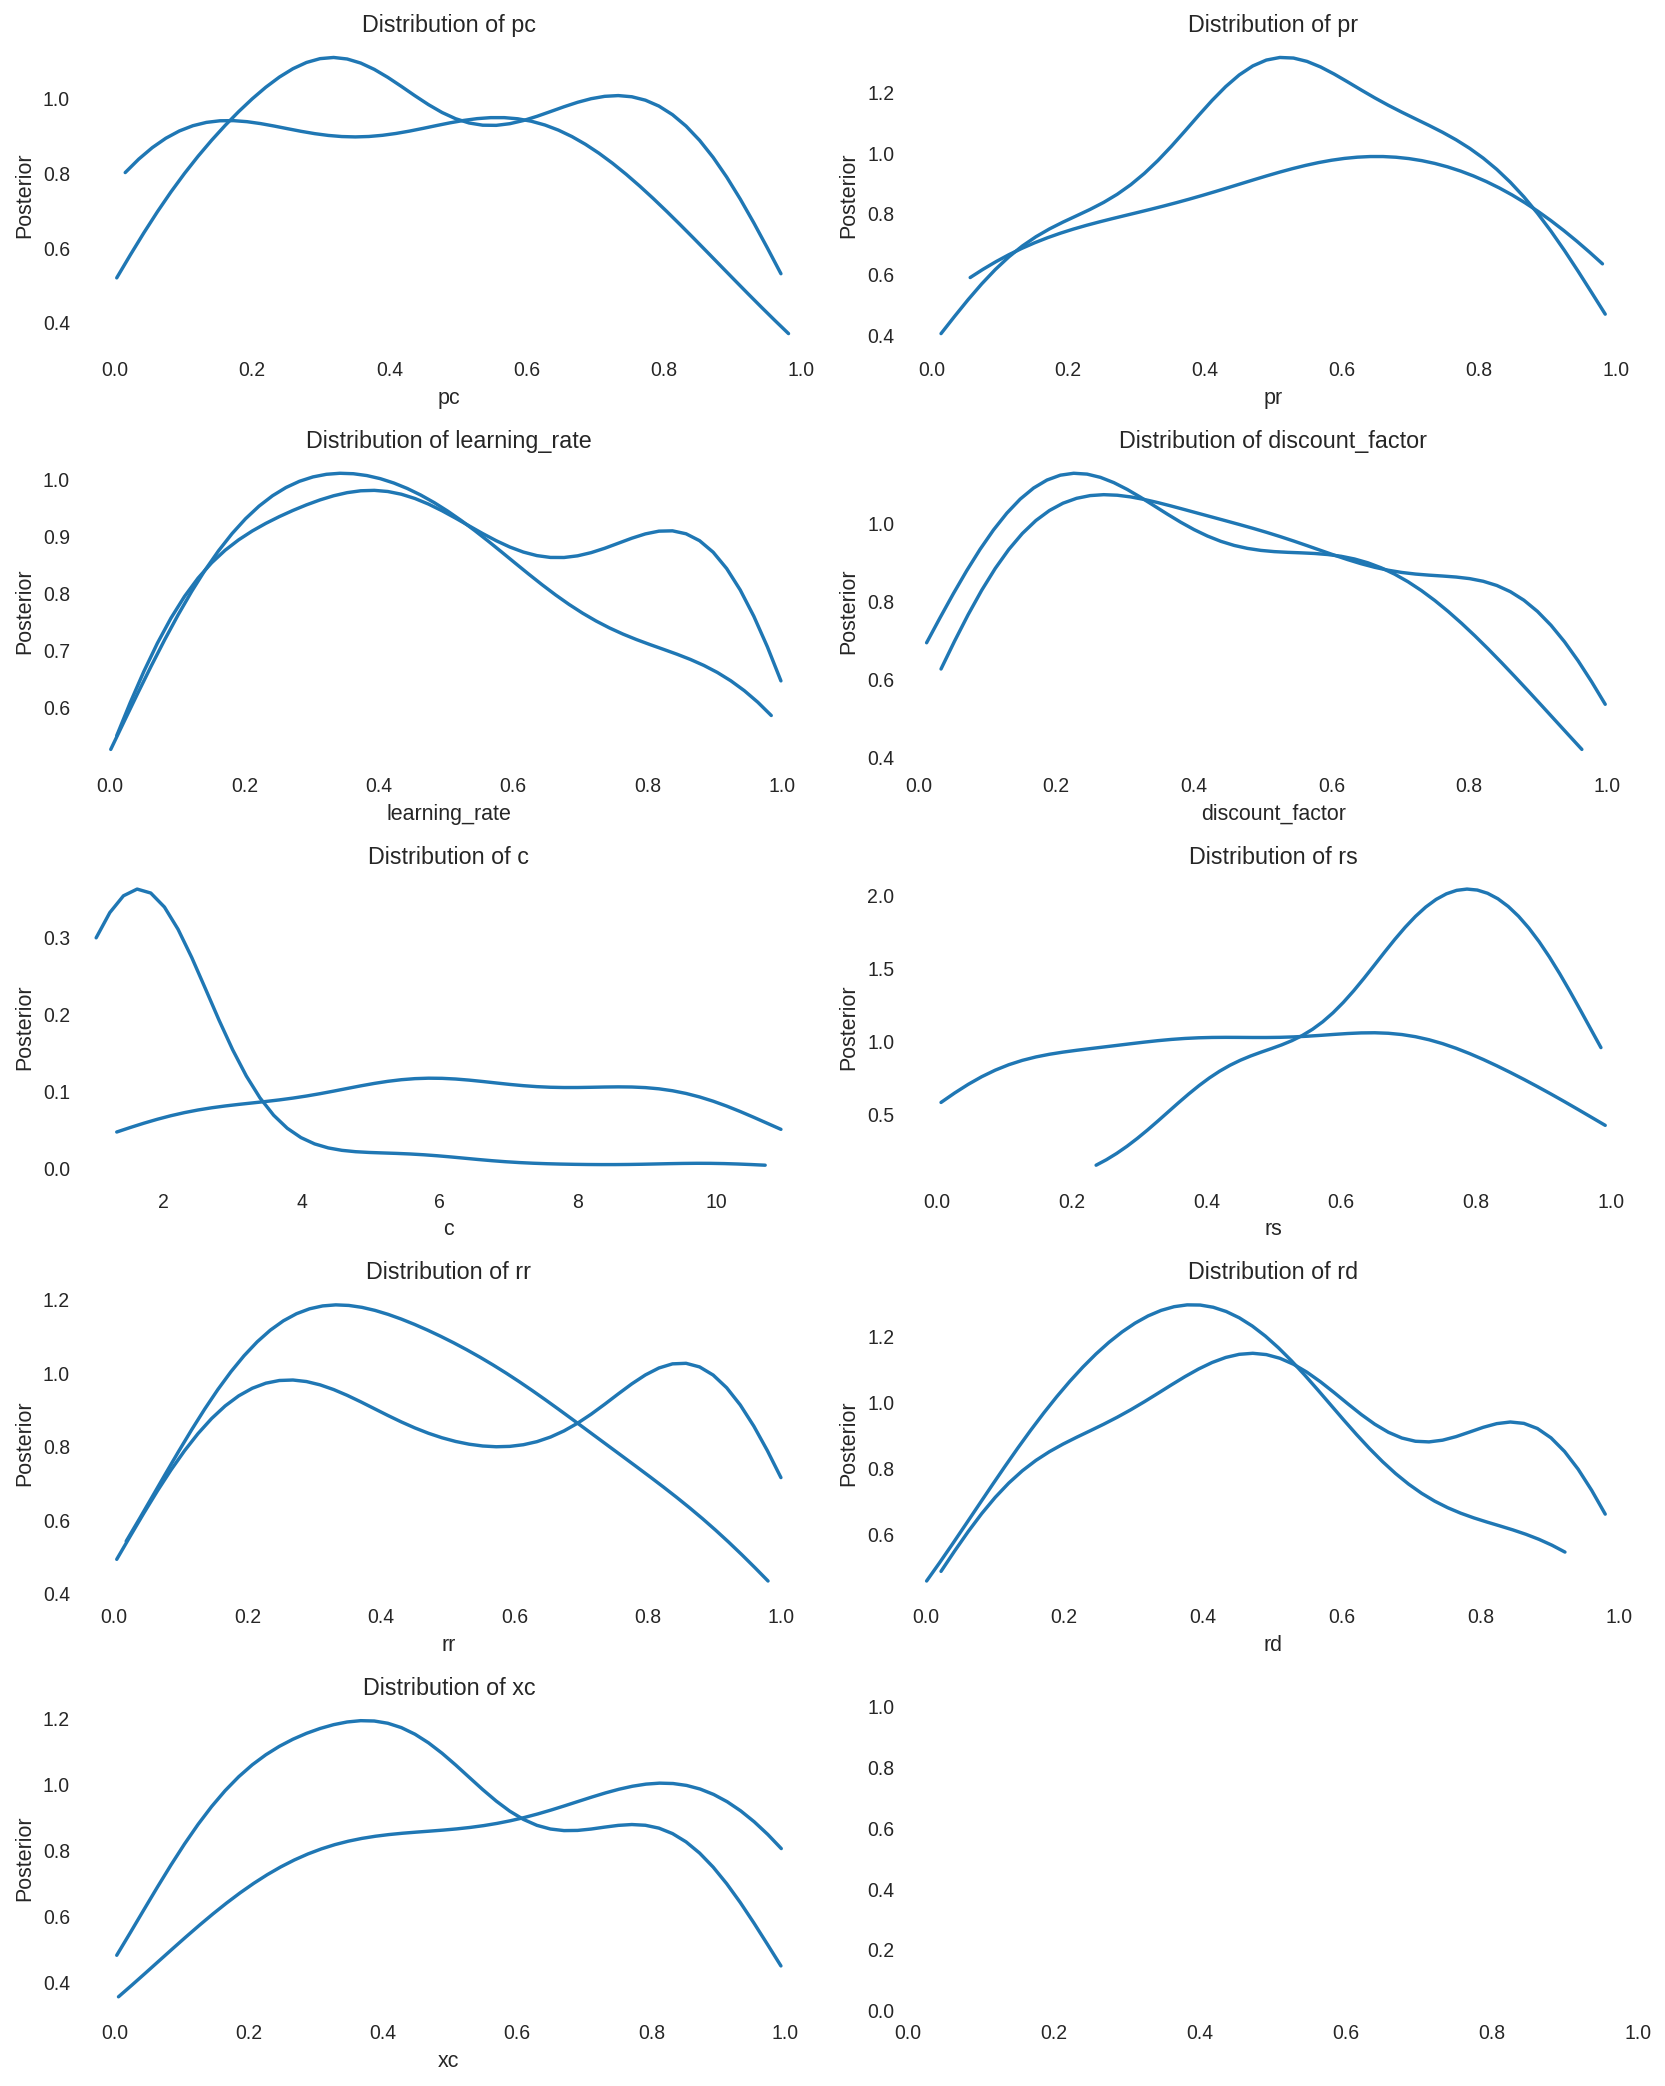

In [ ]:
visualize_parameters(h1)

In [ ]:


# Wasserstein distances
class IdSumstat(pyabc.Sumstat):
    """
    Identity summary statistic.
    
    This class takes a dictionary of data and converts it into an ordered numpy array,
    preserving the sequence of data points as they appear in the dictionary.
    It ensures the output is two-dimensional, which is required for certain distance calculations.
    """
    def __call__(self, data: dict) -> np.ndarray:
        # Extract values in the order of sorted keys to maintain consistent ordering
        ordered_values = [data[key] for key in sorted(data.keys())]
        return np.array(ordered_values).reshape(1, -1)



# Define the summary statistic to use for Wasserstein distance
sumstat = IdSumstat()

# Wasserstein distance configuration
wasserstein = pyabc.SlicedWassersteinDistance(
    metric="sqeuclidean",
    p=2,
    sumstat=sumstat,
    n_proj=10,  # number of random projections for Monte-Carlo integration
)

# Define the ABCSMC object
abc = ABCSMC(
    models=model_abc,
    parameter_priors=parameter_prior,
    distance_function=wasserstein,
    population_size=500,
    transitions=LocalTransition(),
    eps=MedianEpsilon(initial_epsilon=10e16, median_multiplier=.7),
    sampler=sampler
)

# Start the ABC-SMC algorithm
abc_id = abc.new(db_path, observation)
h2 = abc.run(minimum_epsilon=10, max_nr_populations=100)
visualize_parameters(h2)

ABC.History INFO: Start <ABCSMC id=17, start_time=2024-08-22 16:51:28>
ABC INFO: t: 0, eps: 1.00000000e+17.
ABC INFO: Accepted: 1000 / 1000 = 1.0000e+00, ESS: 1.0000e+03.
ABC INFO: t: 1, eps: 1.03769806e+10.
ABC INFO: Accepted: 1000 / 6320 = 1.5823e-01, ESS: 6.8827e+02.
ABC INFO: t: 2, eps: 6.13022689e+09.
